In [15]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

In [3]:
dataset_path = './CNN_dataset'

# List of classes
classes = ['AbdomenCT', 'ChestCT', 'CXR', 'Hand', 'HeadCT']

# Initialize lists to store images and labels
images = []
labels = []

In [4]:
for label, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    for file in os.listdir(class_path):
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            img_path = os.path.join(class_path, file)
            # Load image
            img = Image.open(img_path).convert('L')  # Ensure grayscale ('L' mode)
            img = img.resize((64, 64))  # Resize to 64x64 if needed
            images.append(np.array(img))
            labels.append(label)

In [5]:
# Convert lists to numpy arrays
images = np.array(images, dtype='float32') / 255.0  # Normalize pixel values to [0, 1]
images = np.expand_dims(images, axis=-1)  # Add a channel dimension for grayscale images
labels = np.array(labels)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

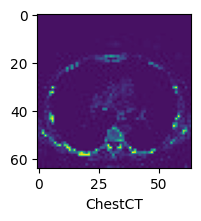

In [9]:
plot_sample(x_train, y_train, 5)

In [10]:
x_train[1]

array([[[0.05882353],
        [0.05882353],
        [0.05098039],
        ...,
        [0.06666667],
        [0.06666667],
        [0.0627451 ]],

       [[0.05882353],
        [0.04313726],
        [0.02745098],
        ...,
        [0.0627451 ],
        [0.06666667],
        [0.07058824]],

       [[0.06666667],
        [0.05882353],
        [0.04705882],
        ...,
        [0.0627451 ],
        [0.06666667],
        [0.07843138]],

       ...,

       [[0.07843138],
        [0.0627451 ],
        [0.05490196],
        ...,
        [0.08627451],
        [0.08235294],
        [0.07843138]],

       [[0.07843138],
        [0.06666667],
        [0.0627451 ],
        ...,
        [0.10588235],
        [0.08627451],
        [0.06666667]],

       [[0.09411765],
        [0.08627451],
        [0.08627451],
        ...,
        [0.08235294],
        [0.05882353],
        [0.10196079]]], dtype=float32)

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(input_shape=(64, 64, 3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [13]:
cnn.fit(x_train, y_train, epochs=15)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9558 - loss: 0.1352
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9985 - loss: 0.0066
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9984 - loss: 0.0061
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9990 - loss: 0.0033
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9995 - loss: 0.0022
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9997 - loss: 7.0892e-04
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9991 - loss: 0.0032
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9993 - loss: 0.0022
Epoch 9/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9999 - loss: 5.1157e-04
Epoch 10/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9987 - loss: 0.0040
Epoch 11/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9999 - loss: 4.1283e-04
Epoch 12/15
125

In [14]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9995 - loss: 0.0019


[0.002017267281189561, 0.9994000196456909]